# Algerian Forest Fires Dataset - Data Analysis and Linear Regression Model Building

Problem statement

Here is algerian dataset which has attributes Attribute Information:

Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
Weather data observations

Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42

RH : Relative Humidity in %: 21 to 90

Ws :Wind speed in km/h: 6 to 29

Rain: total day in mm: 0 to 16.8

FWI Components

Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5

Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9

Drought Code (DC) index from the FWI system: 7 to 220.4

Initial Spread Index (ISI) index from the FWI system: 0 to 18.5

Buildup Index (BUI) index from the FWI system: 1.1 to 68

Fire Weather Index (FWI) Index: 0 to 31.1

Classes: two classes, namely Fire and not Fire

We need to find the temprature as based on the other conditions.

# We have to perform :-

1.Data Collection

2.Exploratory Data Analysis

3.Data Cleaning

4.Model Building

5.Model Predictions


# Import Data and Required Packages

In [1]:
#Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings


warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
#Reading the data
df = pd.read_csv('D:\data science\LINEAR REGRESSION OF ALGERIAN FOREST\Algerian_forest_fires_dataset_UPDATE.csv',header=1)
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [3]:
# drop rows
df.drop([122,123],inplace=True)
df.reset_index(inplace=True)
df.drop('index',axis=1,inplace=True)


In [4]:
df.loc[:122, 'region'] = 'bejaia'
df.loc[122:, 'region'] = 'Sidi-Bel Abbes'

In [5]:
#Stripping the names of the columns
df.columns = [i.strip() for i in df.columns]
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'region'],
      dtype='object')

In [6]:

#Stripping the Classes Features data

df.Classes = df.Classes.str.strip()
df['Classes'].unique()

array(['not fire', 'fire', nan], dtype=object)

# Understanding the dataset

In [7]:
#displaying first 5 rows of dataset
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,bejaia
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,bejaia
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,bejaia
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,bejaia
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,bejaia


In [8]:

#displaying last 5 rows of dataset
df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
239,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,Sidi-Bel Abbes
240,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,Sidi-Bel Abbes
241,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,Sidi-Bel Abbes
242,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,Sidi-Bel Abbes
243,30,09,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire,Sidi-Bel Abbes


In [9]:

#know the datatypes
df.dtypes

day            object
month          object
year           object
Temperature    object
RH             object
Ws             object
Rain           object
FFMC           object
DMC            object
DC             object
ISI            object
BUI            object
FWI            object
Classes        object
region         object
dtype: object

In [10]:
## Changing The DataTypes of the Columns

In [11]:
df['day']=df['day'].astype(int)
df['month']=df['month'].astype(int)
df['year']=df['year'].astype(int)
df['Temperature']=df['Temperature'].astype(int)
df['RH']=df['RH'].astype(int)
df['Rain']=df['Rain'].astype(float)
df['FFMC']=df['FFMC'].astype(float)
df['DMC']=df['DMC'].astype(float)
df['BUI']=df['BUI'].astype(float)
df['ISI']=df['ISI'].astype(float)
df['Ws']=df['Ws'].astype(float)



df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int32  
 1   month        244 non-null    int32  
 2   year         244 non-null    int32  
 3   Temperature  244 non-null    int32  
 4   RH           244 non-null    int32  
 5   Ws           244 non-null    float64
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    object 
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    object 
 13  Classes      243 non-null    object 
 14  region       244 non-null    object 
dtypes: float64(6), int32(5), object(4)
memory usage: 24.0+ KB


In [12]:
#displaying the shape of dataset : No. of rows and No. of columns
df.shape


(244, 15)

In [13]:
#getting overall statistics about the dataframe
df.describe(include='all')

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
count,244.000000,244.000000,244.0,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244,244.000000,244.000000,244,243,244
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,198,NaN,NaN,127,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,NaN,NaN,0.4,fire,bejaia
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,12,137,122
mean,15.754098,7.500000,2012.0,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,NaN,4.774180,16.664754,NaN,NaN,NaN
std,8.825059,1.112961,0.0,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,NaN,4.175318,14.204824,NaN,NaN,NaN
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,NaN,0.000000,1.100000,NaN,NaN,NaN
25%,8.000000,7.000000,2012.0,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,NaN,1.400000,6.000000,NaN,NaN,NaN
50%,16.000000,7.500000,2012.0,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,NaN,3.500000,12.250000,NaN,NaN,NaN
75%,23.000000,8.000000,2012.0,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,NaN,7.300000,22.525000,NaN,NaN,NaN


In [14]:
# how many columns are in the dataframe
df.columns
#there are spaces after the Rain and Classes columns so i rename to take out spaces

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'region'],
      dtype='object')

In [15]:

#renaming column names so as to remove spaces nehind
 
df.rename(columns={'Rain ': 'Rain', 'Classes  ': 'classes'}, inplace=True)

In [16]:

df.nunique()

day             31
month            4
year             1
Temperature     19
RH              62
Ws              18
Rain            39
FFMC           173
DMC            166
DC             198
ISI            106
BUI            174
FWI            127
Classes          2
region           2
dtype: int64

In [17]:
## Applying Label encoding in DC,FWI,region features

from sklearn.preprocessing import LabelEncoder
LabelEncoder=LabelEncoder()

In [18]:
df['DC']=LabelEncoder.fit_transform(df['DC'])
df['FWI']=LabelEncoder.fit_transform(df['FWI'])
df['region']=LabelEncoder.fit_transform(df['region'])

In [19]:
df.dtypes

day              int32
month            int32
year             int32
Temperature      int32
RH               int32
Ws             float64
Rain           float64
FFMC           float64
DMC            float64
DC               int32
ISI            float64
BUI            float64
FWI              int32
Classes         object
region           int32
dtype: object

In [20]:

df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1,6,2012,29,57,18.0,0.0,65.7,3.4,150,1.3,3.4,5,not fire,1
1,2,6,2012,29,61,13.0,1.3,64.4,4.1,150,1.0,3.9,4,not fire,1
2,3,6,2012,26,82,22.0,13.1,47.1,2.5,146,0.3,2.7,1,not fire,1
3,4,6,2012,25,89,13.0,2.5,28.6,1.3,136,0.0,1.7,0,not fire,1
4,5,6,2012,27,77,16.0,0.0,64.8,3.0,18,1.2,3.9,5,not fire,1


In [21]:

#checking for null values.
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
region         0
dtype: int64

In [22]:

#dropped the year and classes attribute as the fires all occured in the same year (2012)
#i dropped classes too as i couldnt compare variables 
df = df.drop(['year', 'Classes'], axis=1)

In [23]:

#check after droppping year attribute

df.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,region
0,1,6,29,57,18.0,0.0,65.7,3.4,150,1.3,3.4,5,1
1,2,6,29,61,13.0,1.3,64.4,4.1,150,1.0,3.9,4,1
2,3,6,26,82,22.0,13.1,47.1,2.5,146,0.3,2.7,1,1
3,4,6,25,89,13.0,2.5,28.6,1.3,136,0.0,1.7,0,1
4,5,6,27,77,16.0,0.0,64.8,3.0,18,1.2,3.9,5,1


# Univariate Analysis

In [24]:
numeric_features= [feature for feature in df.columns if df[feature].dtype !='o']

In [25]:
numeric_features

['day',
 'month',
 'Temperature',
 'RH',
 'Ws',
 'Rain',
 'FFMC',
 'DMC',
 'DC',
 'ISI',
 'BUI',
 'FWI',
 'region']

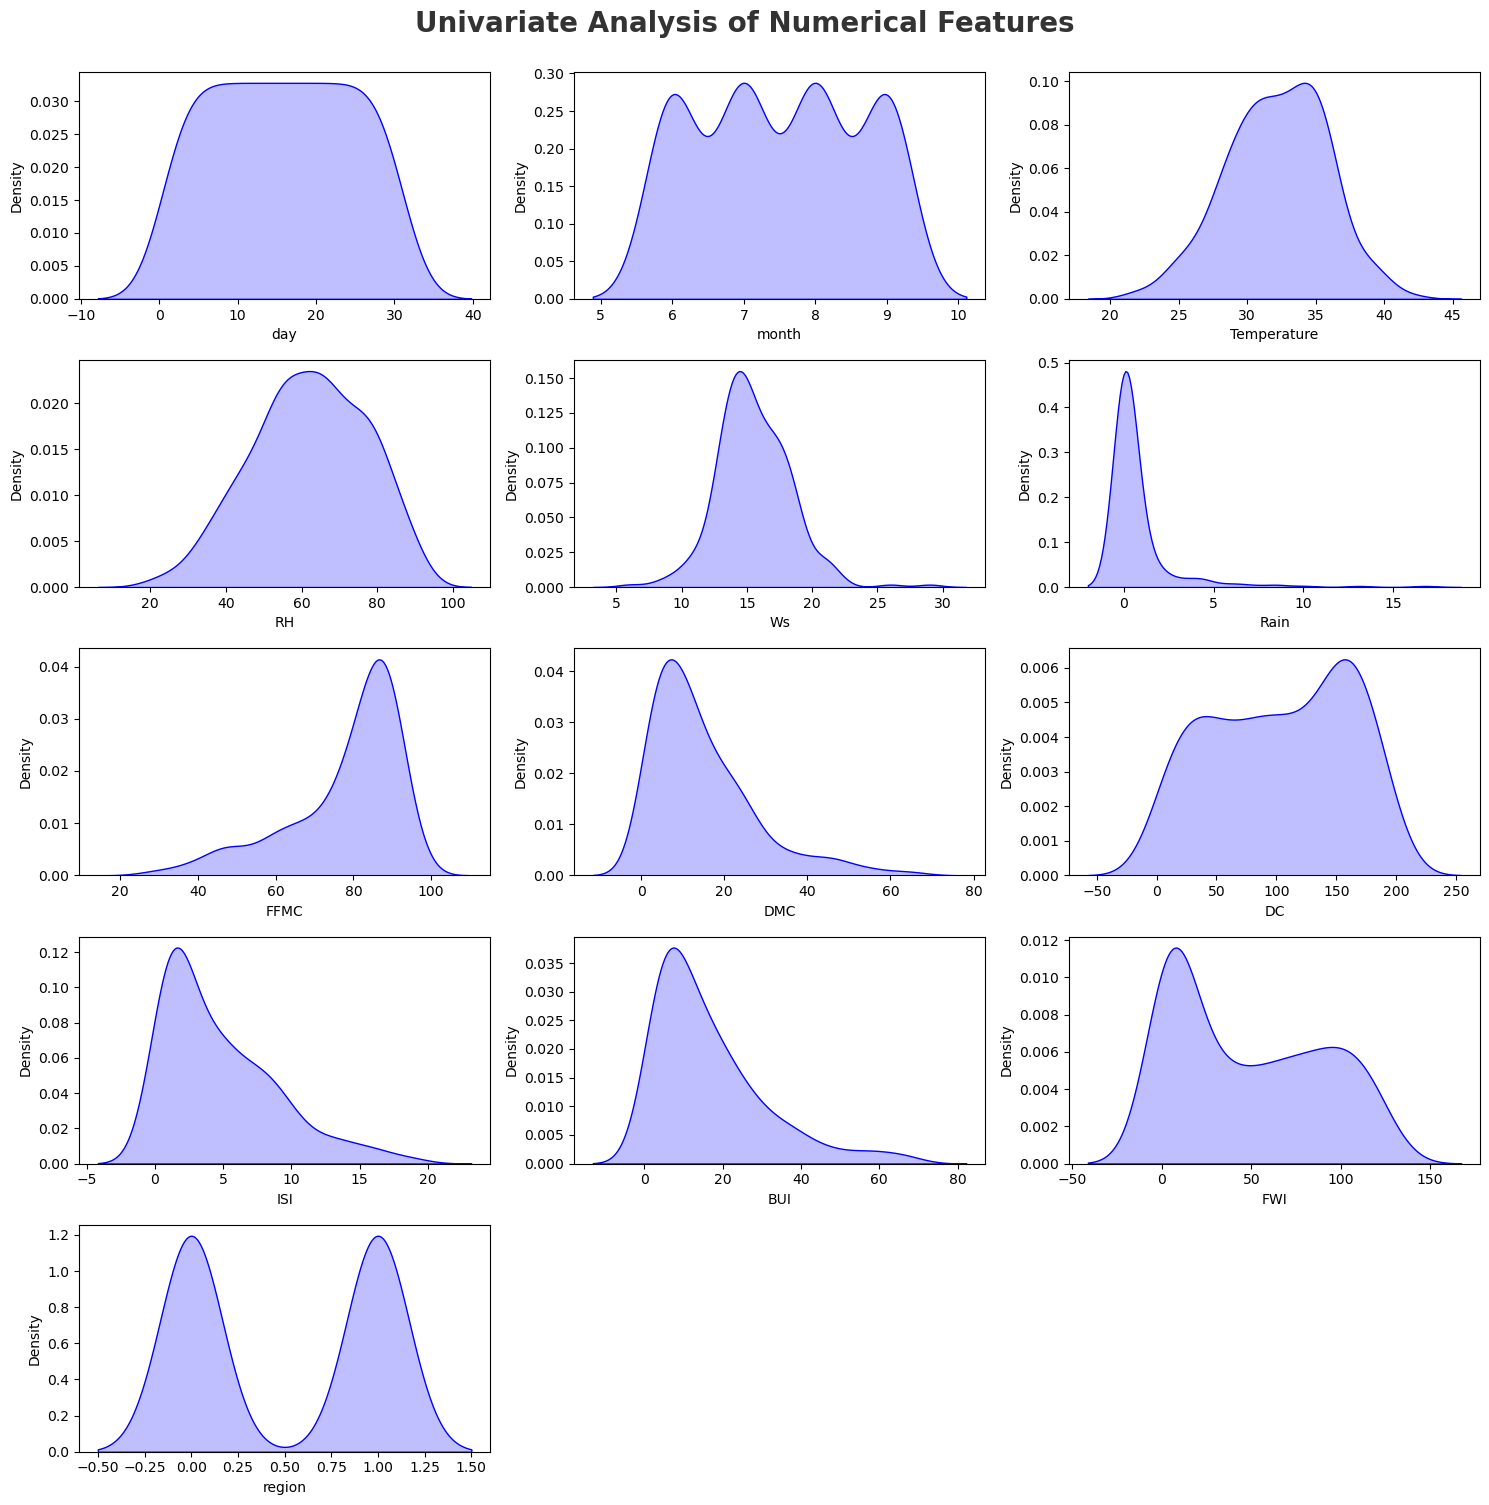

In [26]:
plt.figure(figsize=(15,15))
plt.suptitle('Univariate Analysis of Numerical Features',fontsize=20,fontweight='bold',alpha=0.8,y=1)

for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numeric_features[i]],shade=True, color='b')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

Observations:

Temperature : temperature noon (temperature max) in Celsius degrees: 22 to 42

RH : Relative Humidity in %: 21 to 90

Ws :Wind speed in km/h: 6 to 29

Rain: total day in mm: 0 to 16.8

(FFMC) Fine Fuel Moisture Code index from the FWI system: 28.6 to 92.5

(DMC) Duff Moisture Code index from the FWI system: 1.1 to 65.9

(DC) Drought Code index from the FWI system: 7 to 220.4

(ISI) Initial Spread Index from the FWI system: 0 to 18.5

(BUI) Buildup Index from the FWI system: 1.1 to 68

(FWI) Fire Weather Index: 0 to 31.1

We can also see outliers in most of these features.

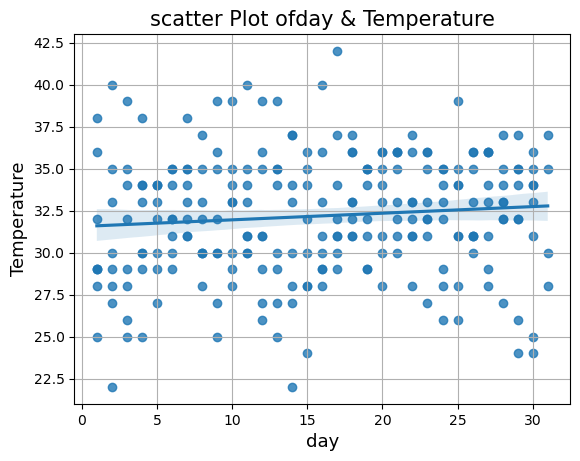

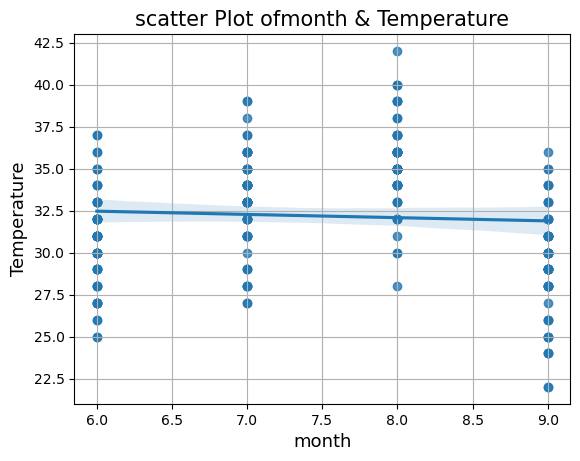

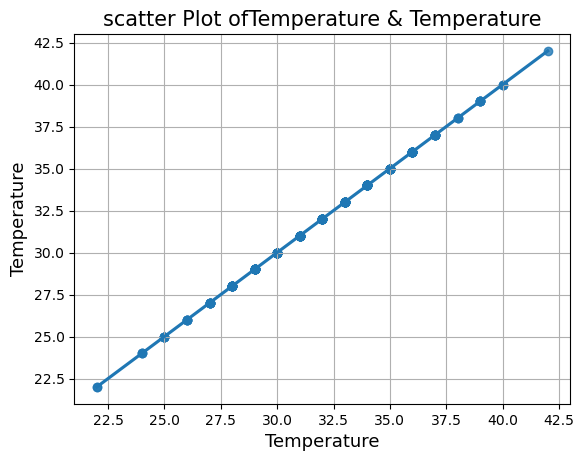

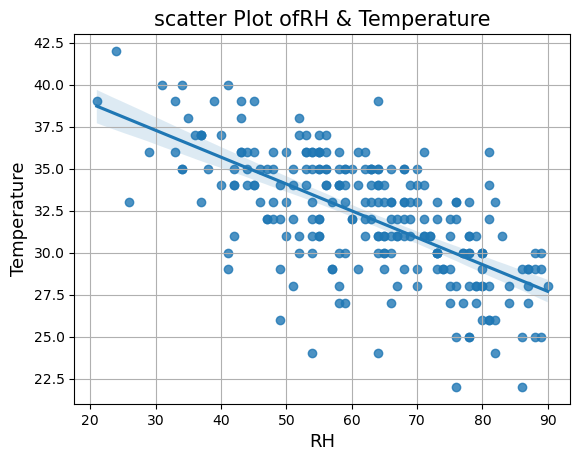

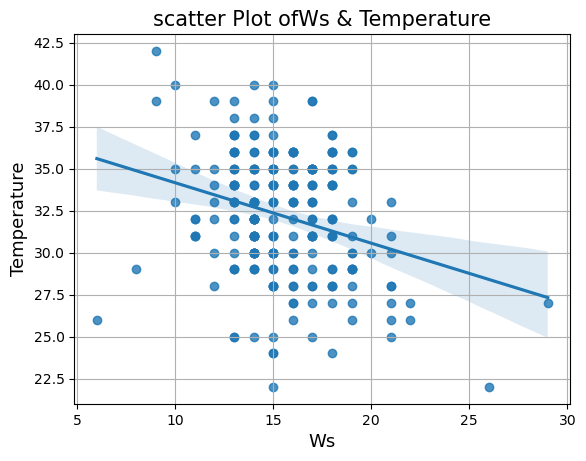

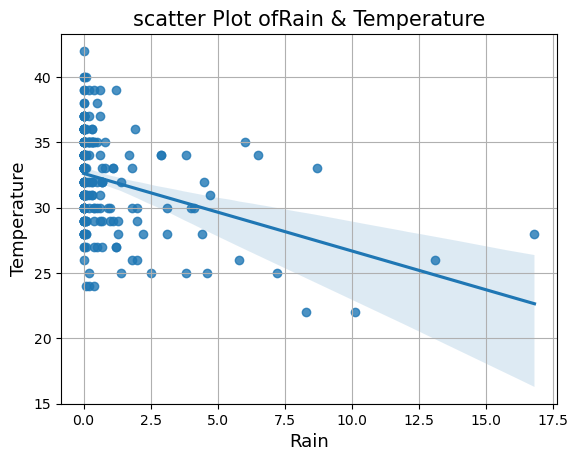

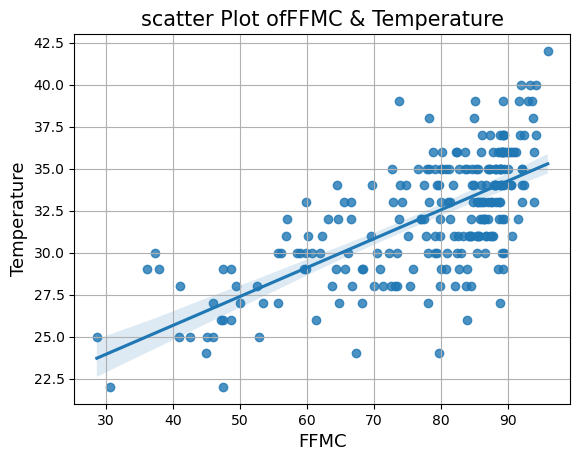

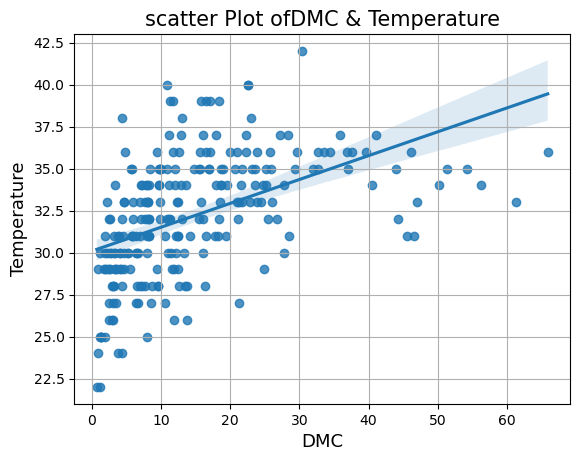

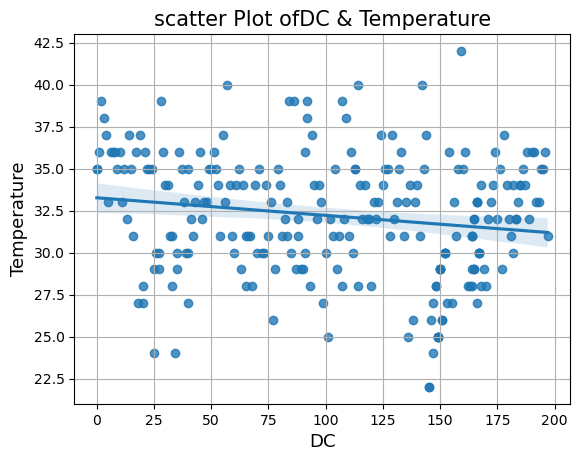

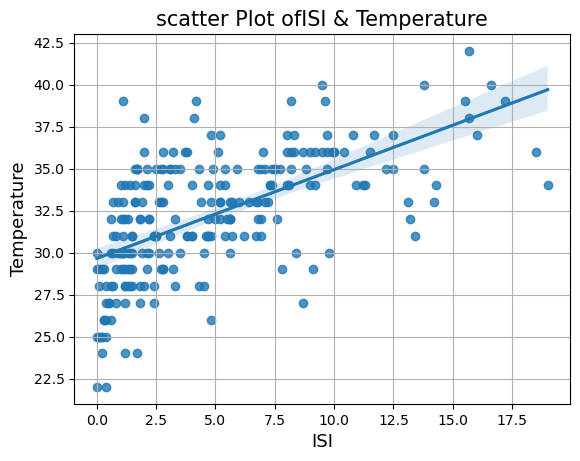

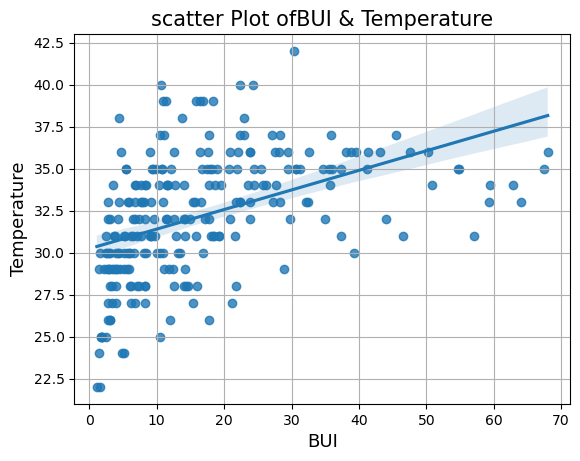

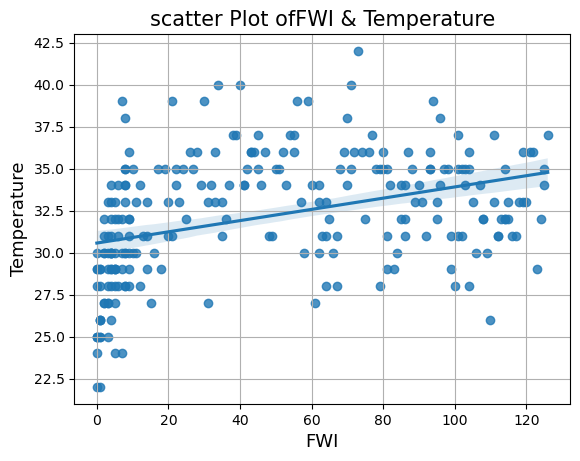

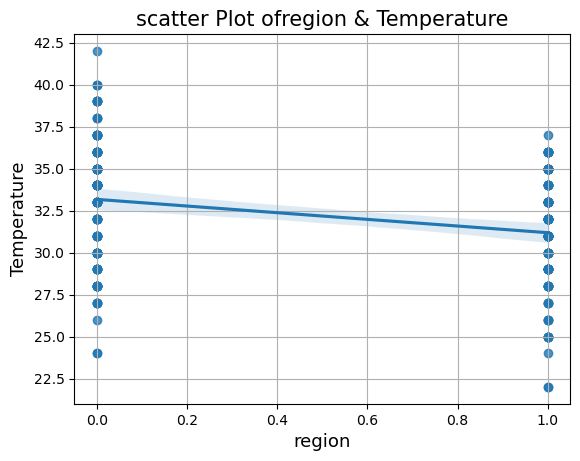

In [27]:
x_axis= numeric_features
y= "Temperature"

for col in x_axis:
    sns.regplot(x=col,y=y,data=df)
    plt.xlabel(col, fontsize = 13)
    plt.ylabel(y,fontsize = 13)
    plt.title("scatter Plot of" +  col + " & " + y , fontsize =15)
    plt.grid()
    plt.show()

Observations:

As we are considering Temperature as our dependent feature we are checking relation of each feature with it.

RH shows negative correlation with Temperature as increase in RH reduces the Temperature.

WS too shows negative correlation with Temperature but not as strong as RH.

FFMC shows strong positive correlation as Temperature increases with FFMC which is clearly seen from the plot.

ISI shows positive correlation with Temperature.

<AxesSubplot:>

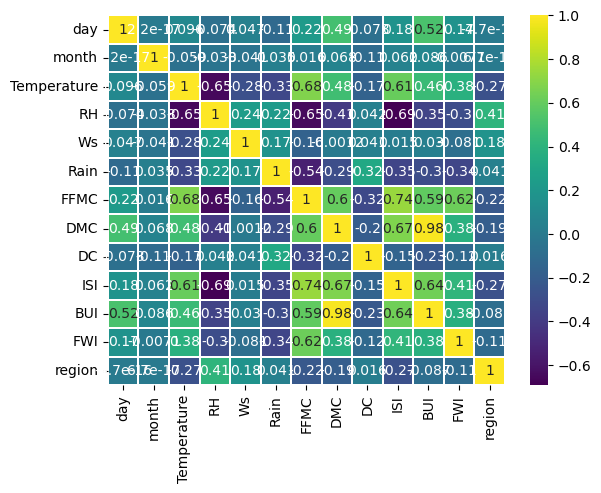

In [28]:
#HEATMAP

#A heatmap is a graphical representation of data that uses a system of color-coding to represent different values. 
#using a correlation heatmap to view rlationship between variables
sns.heatmap(df.corr(),annot=True,cmap='viridis',linewidths=0.2)

array([[<AxesSubplot:title={'center':'day'}>,
        <AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'Temperature'}>,
        <AxesSubplot:title={'center':'RH'}>],
       [<AxesSubplot:title={'center':'Ws'}>,
        <AxesSubplot:title={'center':'Rain'}>,
        <AxesSubplot:title={'center':'FFMC'}>,
        <AxesSubplot:title={'center':'DMC'}>],
       [<AxesSubplot:title={'center':'DC'}>,
        <AxesSubplot:title={'center':'ISI'}>,
        <AxesSubplot:title={'center':'BUI'}>,
        <AxesSubplot:title={'center':'FWI'}>],
       [<AxesSubplot:title={'center':'region'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

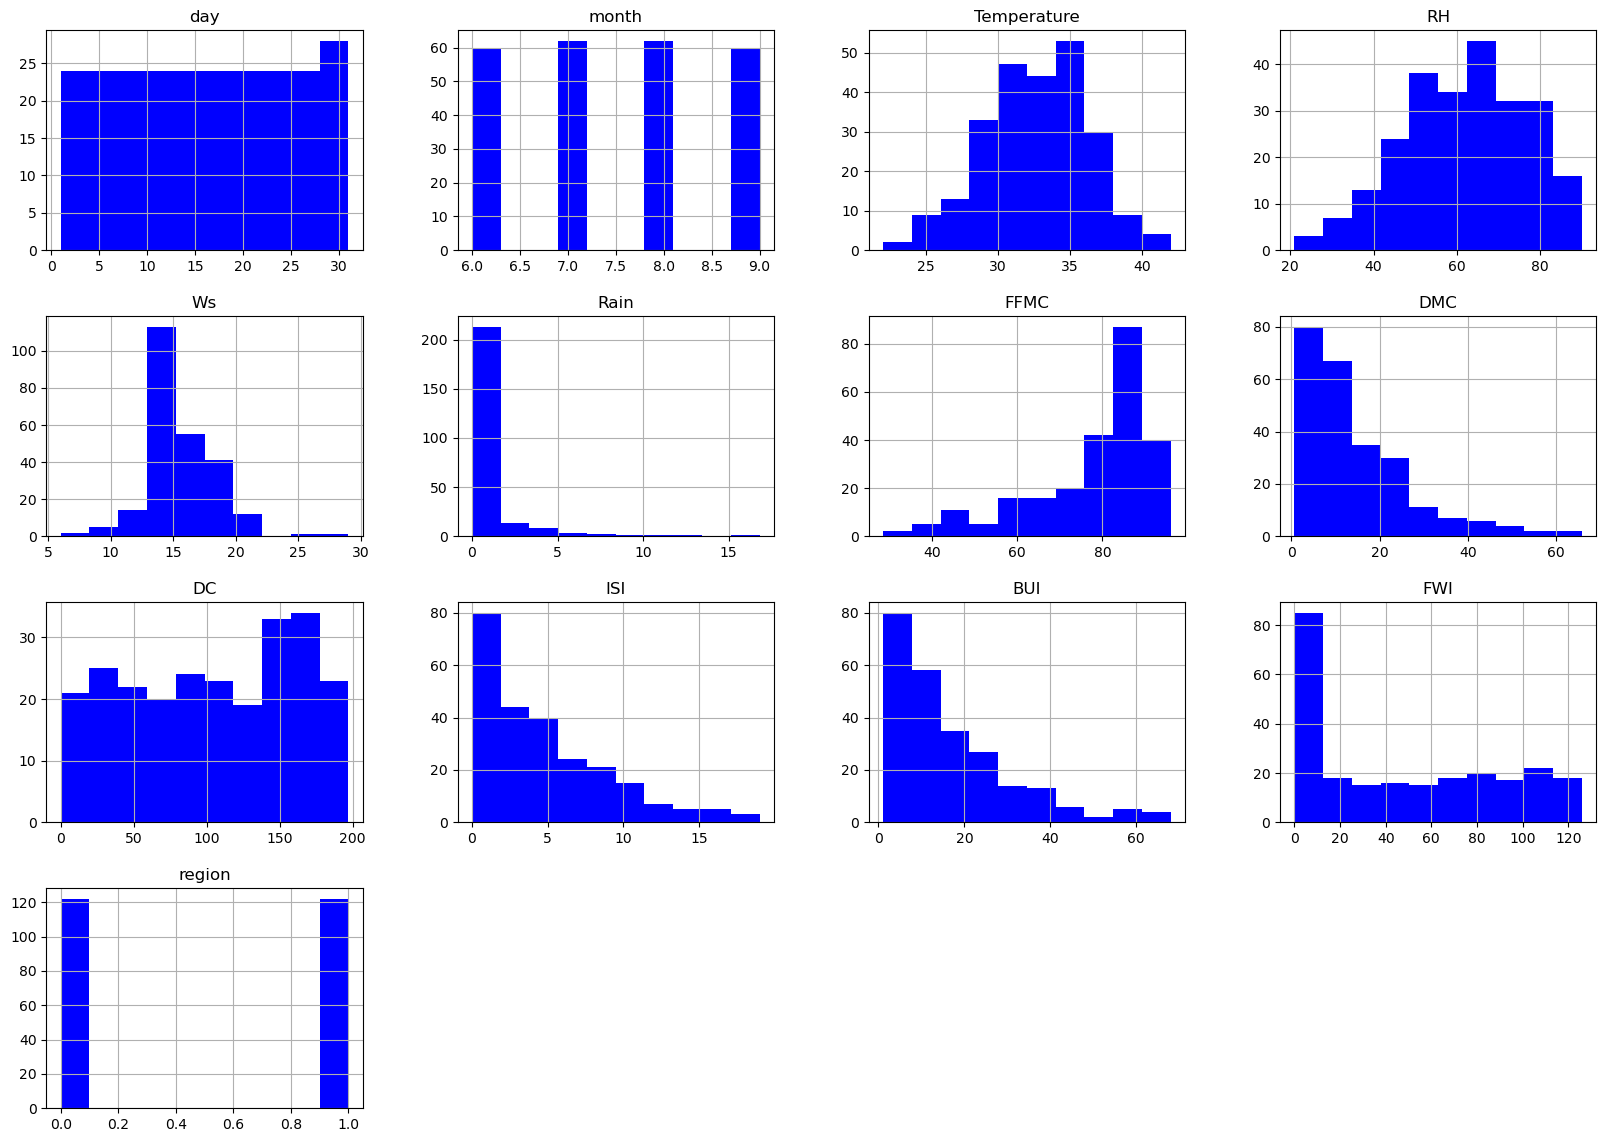

In [29]:
#HISTOGRAM

#A histogram is basically used to represent data provided in a form of some groups.It is accurate method for the graphical 
#representation of numerical data distribution.It is a type of bar plot where X-axis represents the bin ranges while Y-axis 
#gives information about frequency.
df.hist(figsize=(20,14),color='b')

<AxesSubplot:xlabel='Temperature', ylabel='day'>

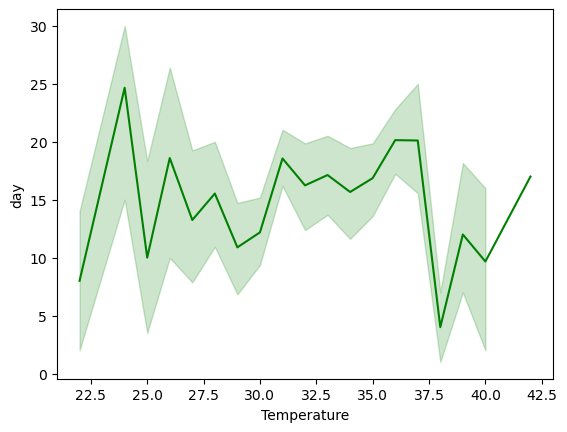

In [30]:
#LINEPLOT
#A Line plot can be defined as a graph that displays data as points or check marks above a number line, showing the frequency
#of each value.

sns.lineplot(x='Temperature',y='day',data=df,color='g')

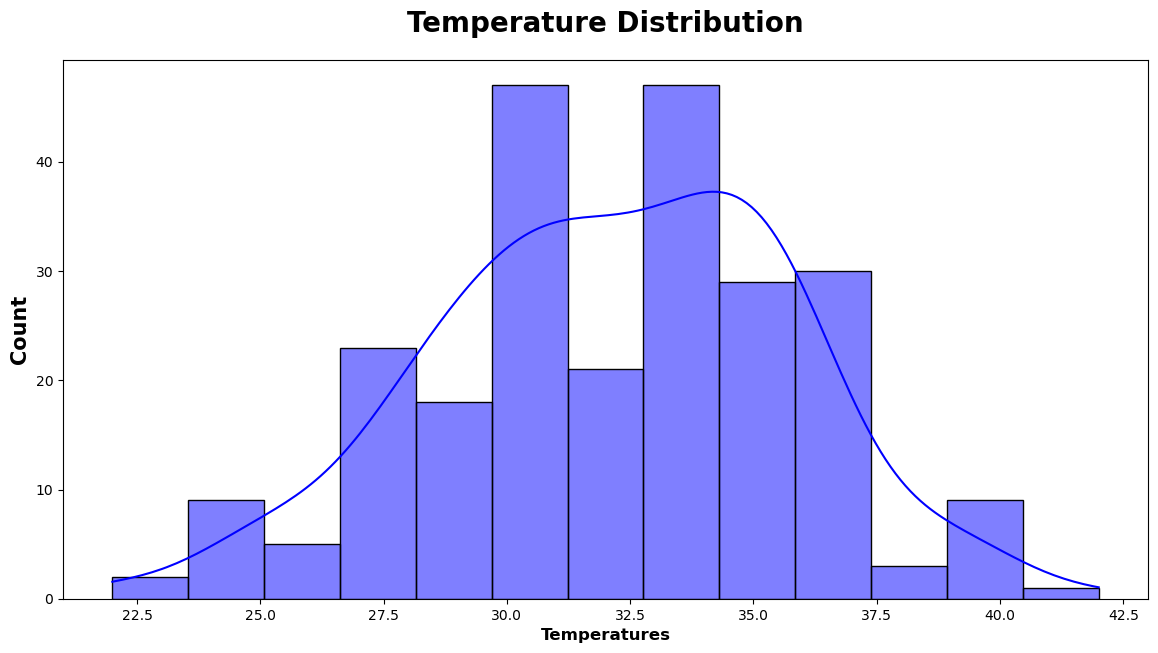

In [31]:
## Visualization of Target Feature
plt.subplots(figsize=(14,7))
sns.histplot(x=df.Temperature, ec = "black", color='blue', kde=True)
plt.title("Temperature Distribution", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=15)
plt.xlabel("Temperatures", weight="bold", fontsize=12)
plt.show()

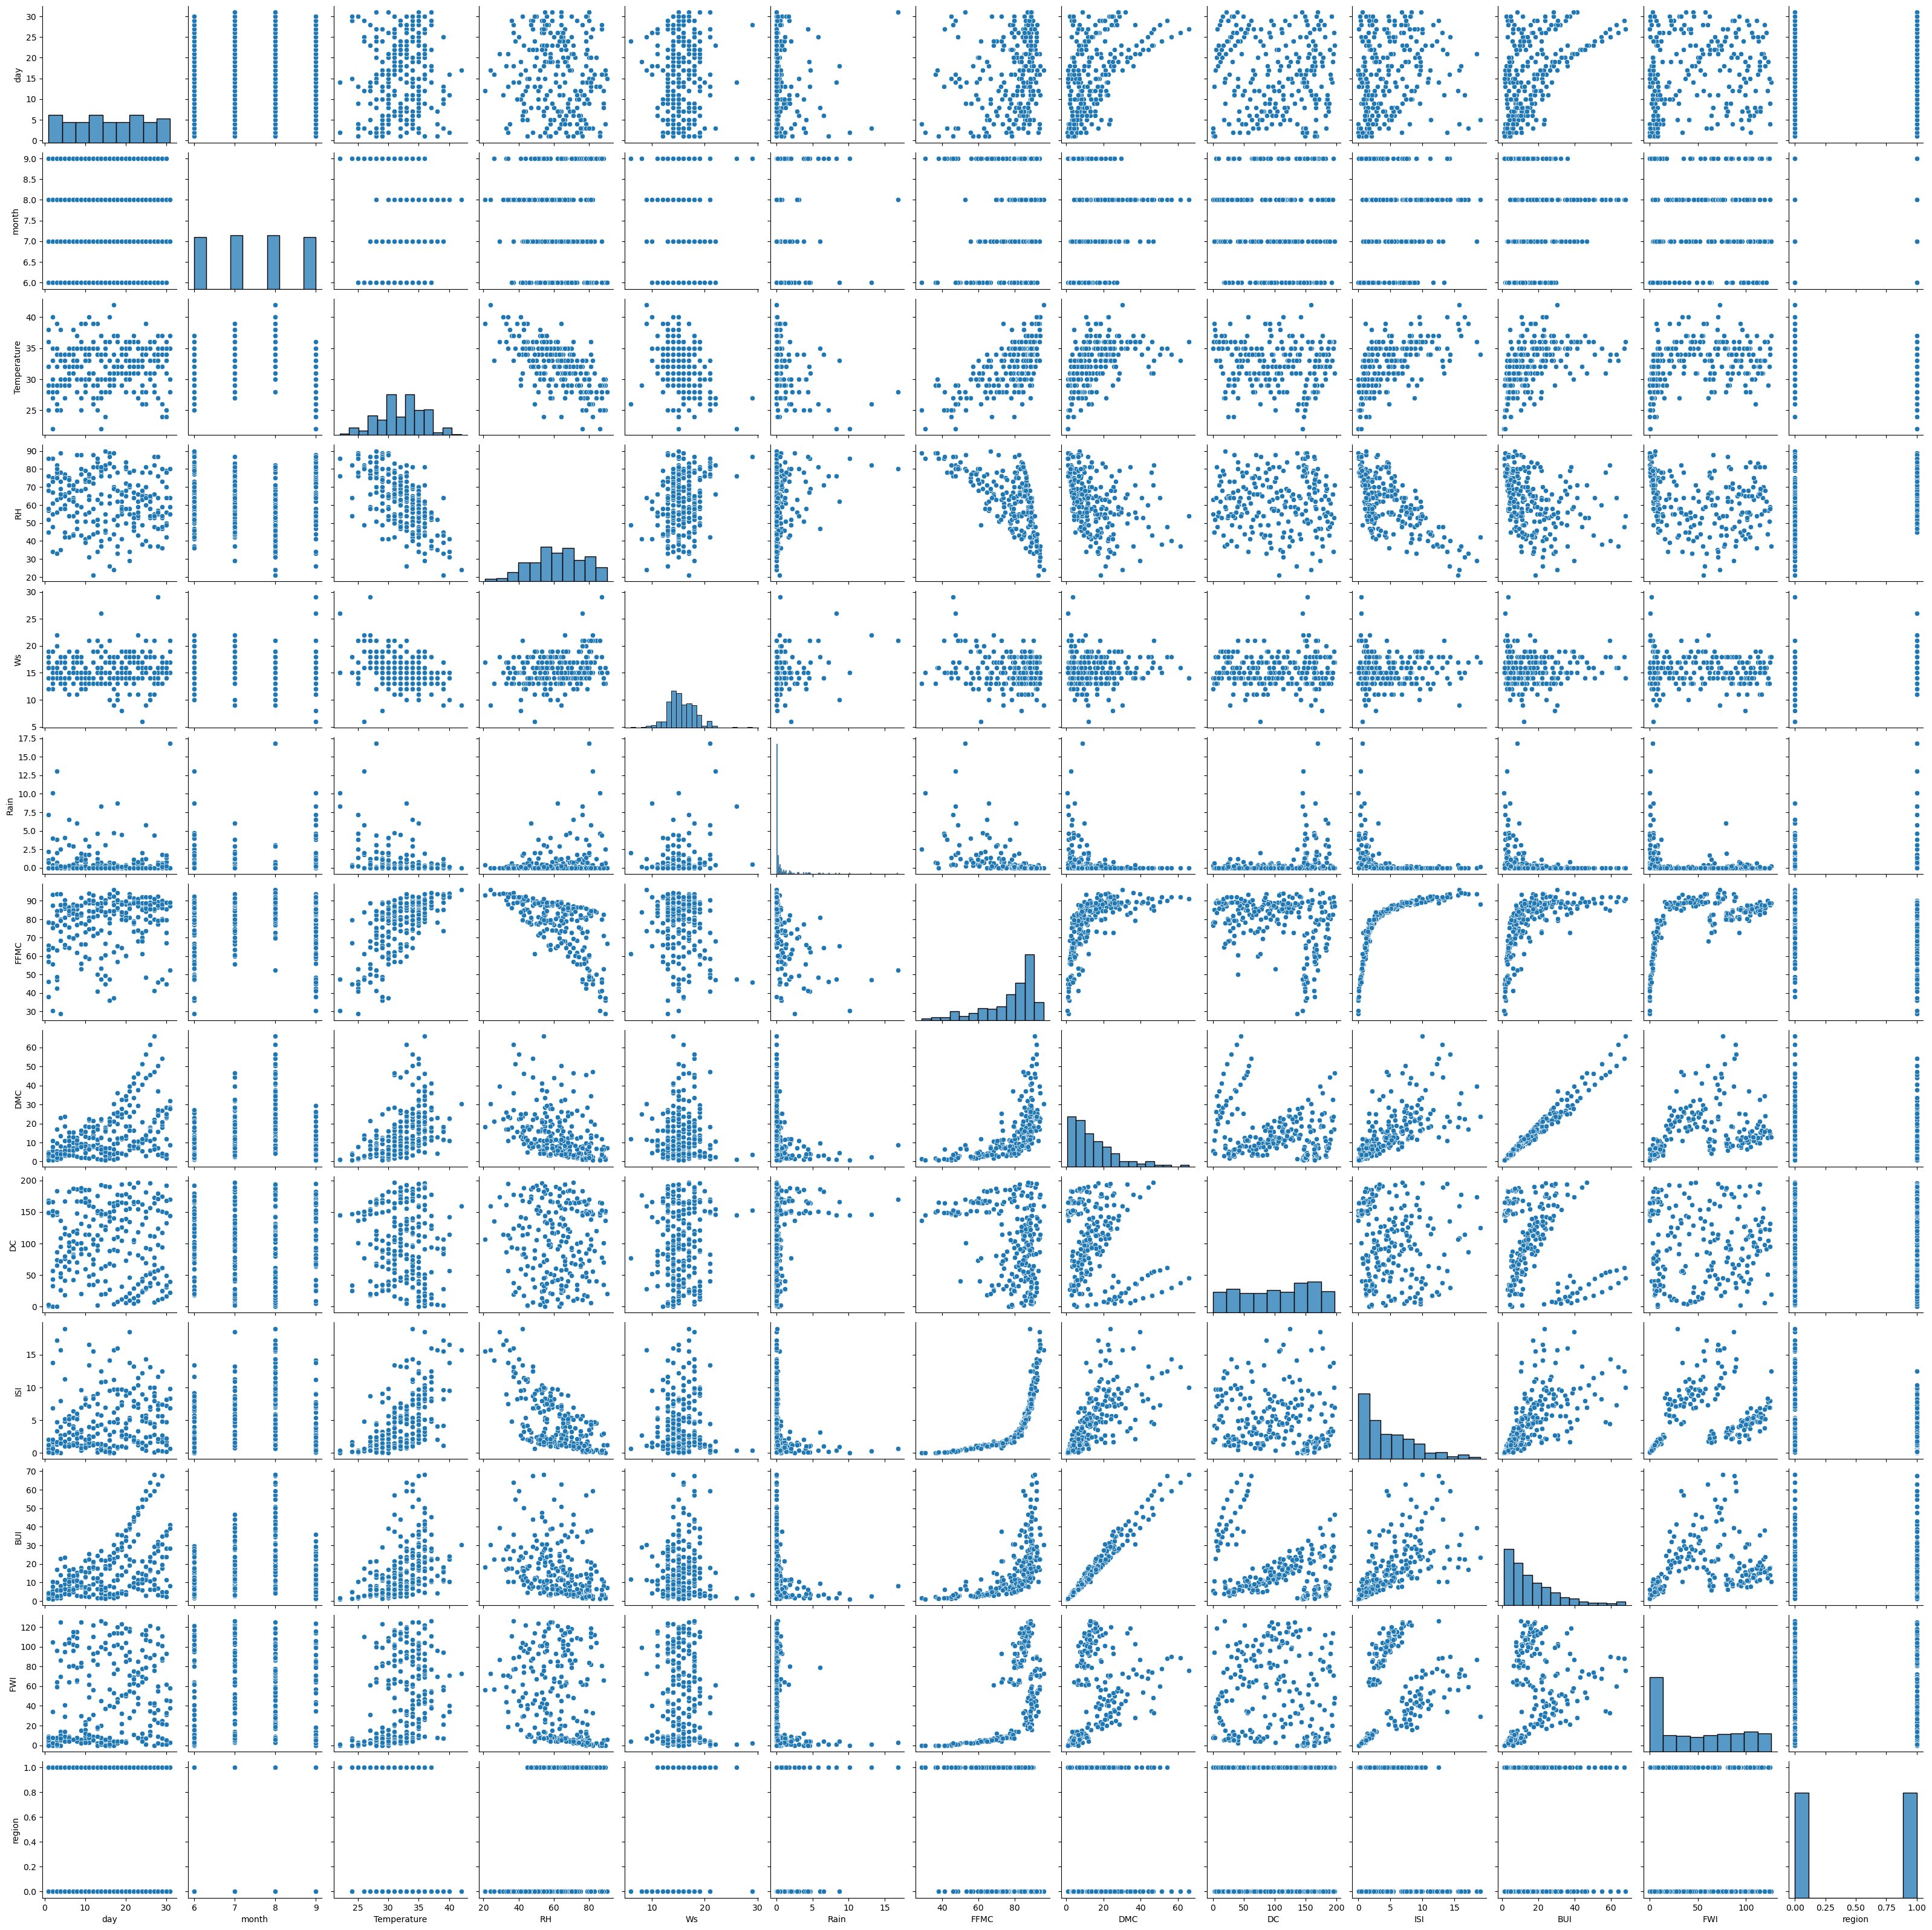

In [32]:
#PAIRPLOT

#A pairplot plot a pairwise relationships in a dataset. The pairplot function creates a grid of Axes such that each variable in
#data will by shared in the y-axis across a single row and in the x-axis across a single column.
sns.pairplot(df)

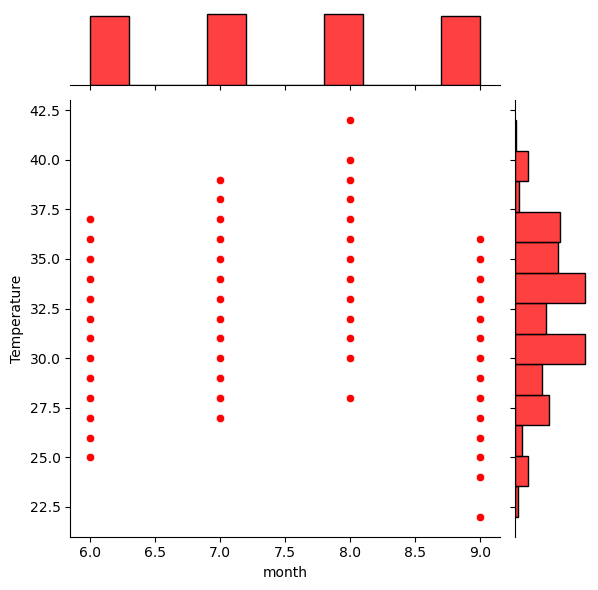

In [33]:
#JOINTPLOT

#Seaborn's jointplot displays a relationship between 2 variables (bivariate) as well as 1D profiles (univariate) in the margins.
#This plot is a convenience class that wraps JointGrid.

sns.jointplot(x='month',y='Temperature',data=df,color='r')

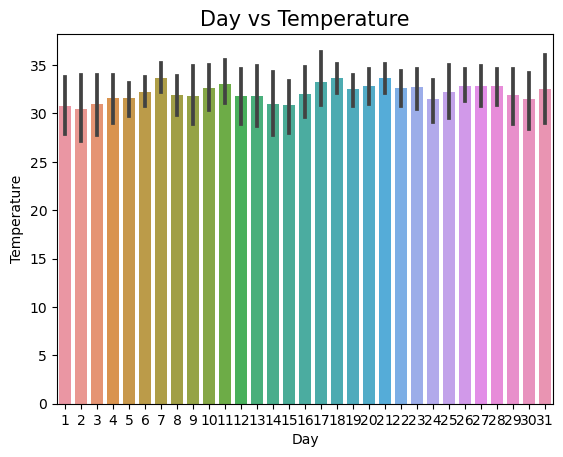

In [34]:
#Barplot

plt.style.use("default")
sns.barplot(x="day", y="Temperature",data=df)
plt.title("Day vs Temperature",fontsize=15)
plt.xlabel("Day")
plt.ylabel("Temperature")
plt.show()

<AxesSubplot:xlabel='day', ylabel='Temperature'>

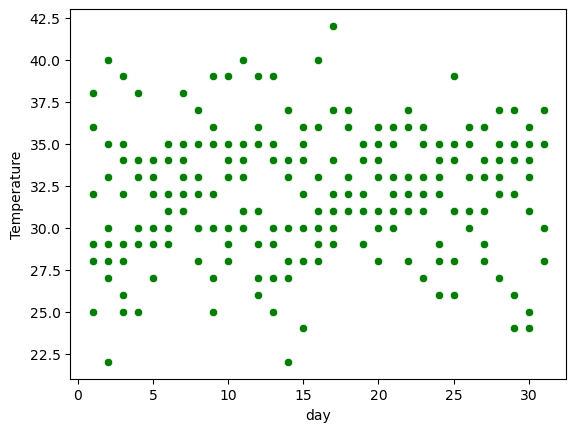

In [35]:

sns.scatterplot(x='day',y='Temperature',data=df,color='g')

<AxesSubplot:xlabel='Temperature', ylabel='ISI'>

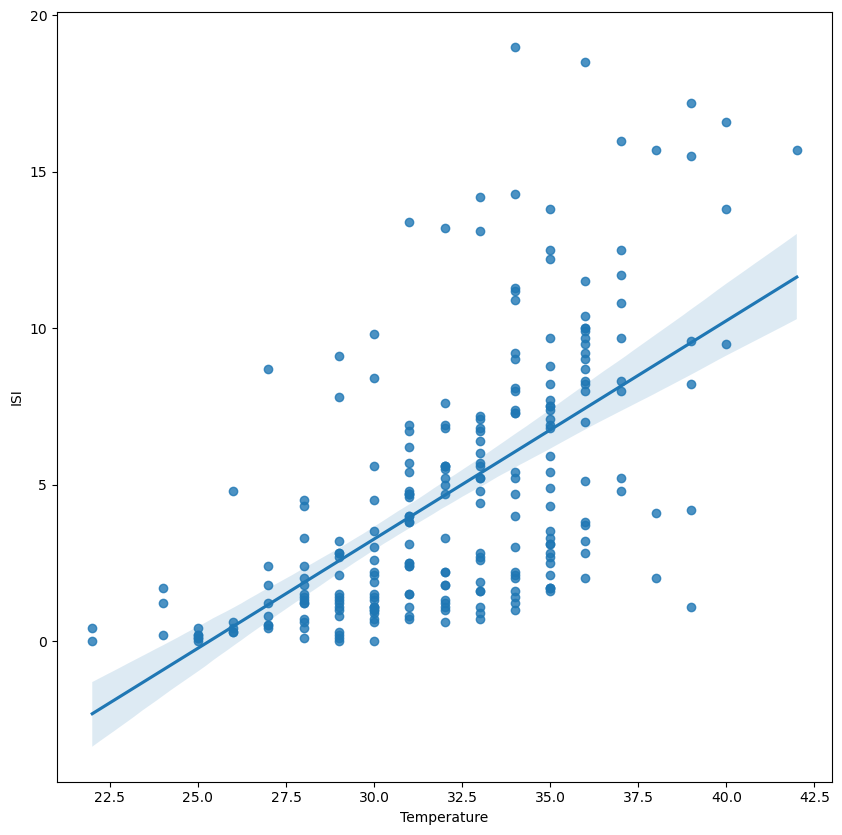

In [36]:
## Temperature Vs ISI

plt.figure(figsize=(10,10))
sns.regplot(x='Temperature',y='ISI',data=df)

<AxesSubplot:xlabel='Temperature'>

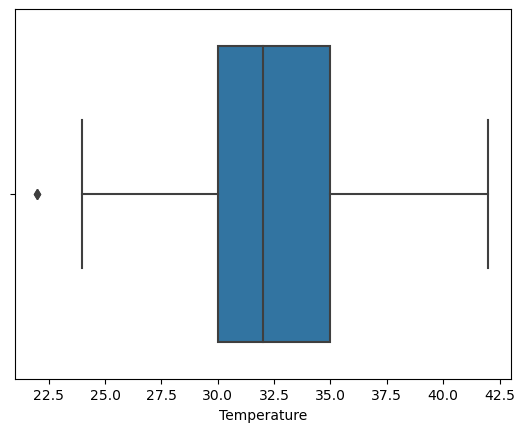

In [37]:
## Checking the outliers of the target 'Temperature' feature
sns.boxplot(df['Temperature'])

In [38]:
#Boxplot of Rain Vs Temperature

<AxesSubplot:xlabel='Temperature', ylabel='Rain'>

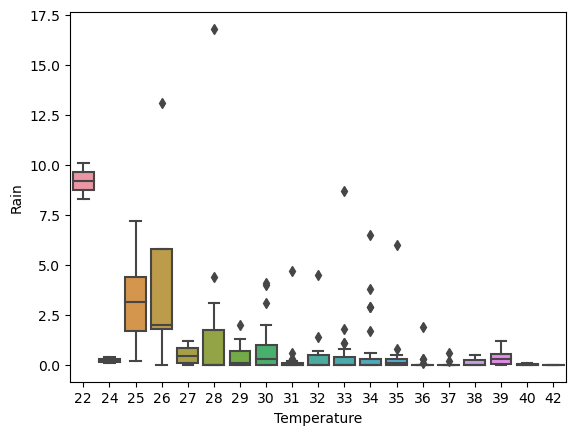

In [39]:
sns.boxplot(x ='Temperature', y ='Rain', data = df)

<AxesSubplot:xlabel='Temperature', ylabel='FFMC'>

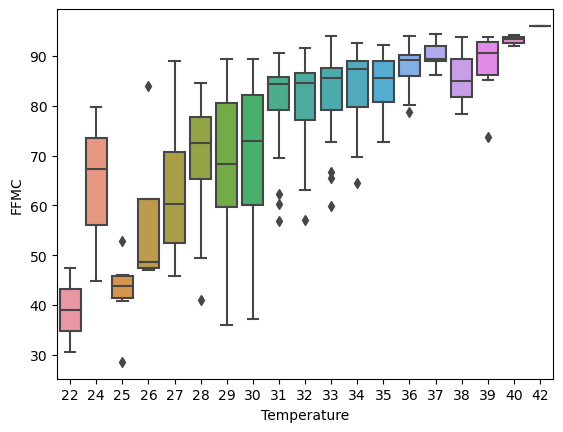

In [40]:
#Boxplot of 'FFMC' Vs Temperature

sns.boxplot(x ='Temperature', y ='FFMC', data = df)

<AxesSubplot:xlabel='Temperature', ylabel='ISI'>

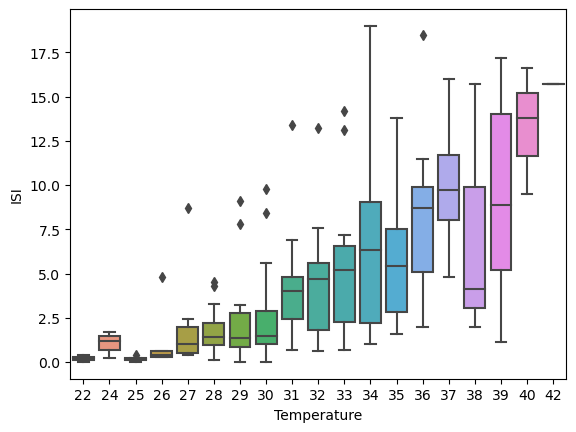

In [41]:
# Boxplot of ISI Vs Temperature

sns.boxplot(x ='Temperature', y ='ISI', data = df)

<AxesSubplot:xlabel='region', ylabel='Temperature'>

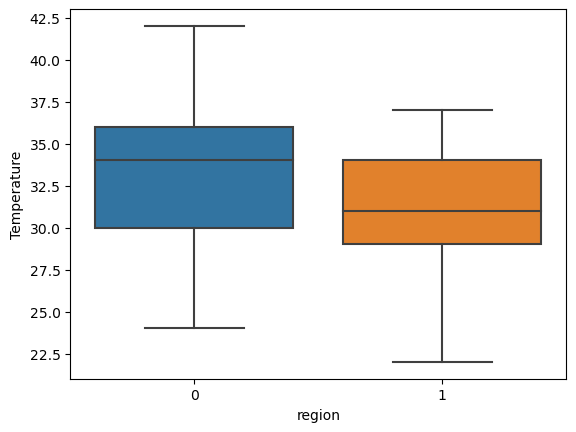

In [42]:
# Boxplot of region Vs Temperature

sns.boxplot(x ='region', y ='Temperature', data = df)

<AxesSubplot:xlabel='Temperature', ylabel='BUI'>

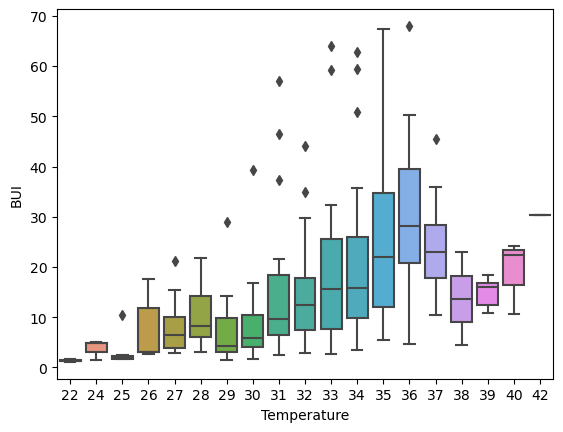

In [43]:
# Boxplot of BUI Vs Temperature
sns.boxplot(x ='Temperature', y ='BUI', data = df)

<AxesSubplot:xlabel='Temperature', ylabel='DMC'>

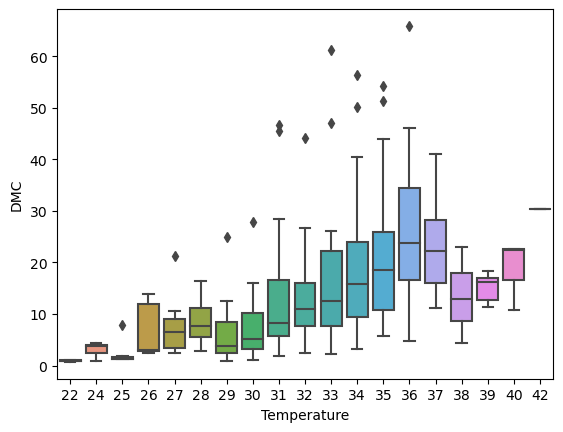

In [44]:
## Boxplot DMC Vs Temperature

sns.boxplot(x ='Temperature', y ='DMC', data = df)

# Questions

In [45]:
#What is the highest temperature in the dataset
df.Temperature.max()

42

In [46]:
#What is the lowest temperature in the dataset
df.Temperature.min()

22

In [47]:
#When did it rain the most
#the 31st day in the 8th month with 16.8mm of rainfall
highest_rain = df.sort_values(by='Rain', ascending=False)[['Rain', 'day','month']].head(1)
highest_rain

,Rain,day,month
91,16.8,31,8


In [48]:
#What did it rain the least
#the 6th month with 0.0mm of rainfall
lowest_rain = df.sort_values(by='Rain', ascending=True)[['Rain', 'day', 'month']].head(1)
lowest_rain

,Rain,day,month
0,0.0,1,6


In [49]:
#What month is the hottest
#the 8th month
highest_month = df.sort_values(by='Temperature', ascending=False)[['month']].head(1)
highest_month

,month
199,8


In [50]:
#what day has the highest temperature in the dataset?
#The highest Temperature is 42 degrees and it occured on the 17th of  the 8th Month).
highest_temp = df.sort_values(by='Temperature', ascending=False)[['Temperature','day','month']].head(1)
highest_temp


,Temperature,day,month
199,42,17,8


In [51]:
highest_temp = df.sort_values(by='Temperature', ascending=False)[['Temperature', 'day','month', 'Rain']].head(1)

lowest_temp =  df.sort_values(by='Temperature', ascending=True)[['Temperature', 'day','month', 'Rain']].head(1)

print("Highest Temperatures")
print(highest_temp)

print()

print("Lowest Temperatures")
print(lowest_temp)

Highest Temperatures
     Temperature  day  month  Rain
199           42   17      8   0.0

Lowest Temperatures
     Temperature  day  month  Rain
105           22   14      9   8.3


# Creating Dependent and Independent features

In [52]:
## Independent Features

x=pd.DataFrame(df, columns=['RH','Ws','Rain','FFMC','DMC','DC','ISI','BUI','FWI','region'])  

## Dependent Features

y=pd.DataFrame(df,columns=['Temperature'])

In [53]:
x

,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,region
0,57,18.0,0.0,65.7,3.4,150,1.3,3.4,5,1
1,61,13.0,1.3,64.4,4.1,150,1.0,3.9,4,1
2,82,22.0,13.1,47.1,2.5,146,0.3,2.7,1,1
3,89,13.0,2.5,28.6,1.3,136,0.0,1.7,0,1
4,77,16.0,0.0,64.8,3.0,18,1.2,3.9,5,1
...,...,...,...,...,...,...,...,...,...,...
239,65,14.0,0.0,85.4,16.0,112,4.5,16.9,106,0
240,87,15.0,4.4,41.1,6.5,164,0.1,6.2,0,0
241,87,29.0,0.5,45.9,3.5,153,0.4,3.4,2,0
242,54,18.0,0.1,79.7,4.3,25,1.7,5.1,7,0


In [54]:
y

,Temperature
0,29
1,29
2,26
3,25
4,27
...,...
239,30
240,28
241,27
242,24


# TrainTest Split

In [55]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=10)

In [56]:
x_train.shape

(163, 10)

In [57]:
x_test.shape

(81, 10)

In [58]:
y_train.shape

(163, 1)

In [59]:
y_test.shape

(81, 1)

In [60]:
x_train

,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,region
237,49,6.0,2.0,61.3,11.9,77,0.6,11.9,4,0
78,54,18.0,0.0,89.4,20.0,8,9.7,27.5,47,1
25,64,18.0,0.0,86.8,17.8,157,6.7,21.6,20,1
124,80,14.0,2.0,48.7,2.2,150,0.3,2.6,1,0
176,64,9.0,1.2,73.8,11.7,28,1.1,11.4,7,0
...,...,...,...,...,...,...,...,...,...,...
64,69,13.0,0.0,85.0,8.2,53,4.0,8.2,86,1
15,89,13.0,0.7,36.1,1.7,150,0.0,2.2,0,1
228,51,13.0,0.0,88.7,16.0,122,6.9,17.8,124,0
125,64,14.0,0.0,79.4,5.2,26,2.2,5.6,10,0


In [61]:
x_test

,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,region
162,56,15.0,2.9,74.8,7.1,185,1.6,6.8,8,0
60,64,17.0,0.0,87.2,31.9,22,6.8,41.2,45,1
61,45,14.0,0.0,78.8,4.8,1,2.0,4.7,9,1
63,63,14.0,0.3,76.6,5.7,0,1.7,5.5,8,1
69,59,17.0,0.0,87.4,14.8,132,6.9,17.9,125,1
...,...,...,...,...,...,...,...,...,...,...
169,68,15.0,0.0,86.1,23.9,123,5.2,23.9,120,0
232,41,8.0,0.1,83.9,24.9,177,2.7,28.9,99,0
144,59,16.0,0.8,74.2,7.0,166,1.6,6.7,8,0
208,37,16.0,0.0,92.2,61.3,38,13.1,64.0,89,0


In [62]:
y_train

,Temperature
237,26
78,36
25,31
124,29
176,39
...,...
64,34
15,29
228,32
125,30


In [63]:
y_test

,Temperature
162,34
60,35
61,36
63,35
69,35
...,...
169,33
232,29
144,33
208,33


# Standardizing or Feature Scaling

In [64]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()#intialising

In [65]:
scaler

StandardScaler()

In [66]:
x_train=scaler.fit_transform(x_train)

In [67]:
x_test=scaler.transform(x_test)

In [68]:
x_train

array([[-0.85631108, -3.36419461,  0.88853946, ..., -0.32535487,
        -1.03738328, -0.98176139],
       [-0.52508491,  0.99944243, -0.441414  , ...,  0.76565444,
        -0.01141751,  1.01857744],
       [ 0.13736742,  0.99944243, -0.441414  , ...,  0.35302912,
        -0.65562857,  1.01857744],
       ...,
       [-0.72382061, -0.81873967, -0.441414  , ...,  0.08727045,
         1.825777  , -0.98176139],
       [ 0.13736742, -0.45510325, -0.441414  , ..., -0.76595478,
        -0.89422526, -0.98176139],
       [ 1.13104591, -1.18237609, -0.441414  , ..., -0.27639932,
        -0.91808493,  1.01857744]])

In [69]:
x_test

array([[-3.92594448e-01, -9.14668296e-02,  1.48701853e+00,
        -1.82411230e-01, -6.02677495e-01,  1.41938909e+00,
        -7.33442383e-01, -6.82030988e-01, -9.41944600e-01,
        -9.81761387e-01],
       [ 1.37367416e-01,  6.35806011e-01, -4.41414004e-01,
         6.64566895e-01,  1.37979749e+00, -1.44016117e+00,
         4.94418103e-01,  1.72378441e+00, -5.91368483e-02,
         1.01857744e+00],
       [-1.12129201e+00, -4.55103250e-01, -4.41414004e-01,
         9.08075201e-02, -7.86536062e-01, -1.80856948e+00,
        -6.38991577e-01, -8.28897625e-01, -9.18084931e-01,
         1.01857744e+00],
       [ 7.11221826e-02, -4.55103250e-01, -2.41920984e-01,
        -5.94627923e-02, -7.14591405e-01, -1.82611273e+00,
        -7.09829682e-01, -7.72948430e-01, -9.41944600e-01,
         1.01857744e+00],
       [-1.93858749e-01,  6.35806011e-01, -4.41414004e-01,
         6.78227832e-01,  1.28490116e-02,  4.89596678e-01,
         5.18030804e-01,  9.42640966e-02,  1.84963667e+00,
         1.

# Linear Regression Model Training

In [70]:
from sklearn.linear_model import LinearRegression

In [71]:
regression=LinearRegression()
regression
regression.fit(x_train,y_train)

LinearRegression()

In [72]:
##print the coefficient
print(regression.coef_)

[[-1.27500995 -0.53842199 -0.21205266  0.70886534 -1.02729123 -0.32455869
   0.2501139   1.35400654  0.21687466 -0.23115864]]


In [73]:
#print the intercept
print(regression.intercept_)

[32.17791411]


In [74]:
##prediction for the test data
reg_pred = regression.predict(x_test)

In [75]:
reg_pred

array([[31.35728286],
       [33.48448971],
       [33.68885621],
       [32.00434093],
       [32.90791395],
       [35.12184072],
       [32.88392257],
       [34.41877632],
       [31.94627835],
       [32.98721461],
       [33.30675698],
       [27.36975802],
       [35.07784211],
       [29.24028529],
       [31.85823402],
       [32.41802576],
       [34.37535576],
       [28.09756027],
       [36.26505018],
       [34.01992072],
       [32.55507349],
       [34.37404142],
       [32.95376928],
       [33.26908507],
       [36.11652279],
       [29.43281151],
       [31.64047533],
       [32.38849979],
       [27.56606986],
       [32.22728534],
       [25.99441341],
       [27.23155419],
       [34.06867619],
       [31.64327002],
       [32.76692249],
       [31.05185077],
       [29.01675218],
       [33.06175783],
       [27.69372403],
       [35.63560078],
       [32.8693709 ],
       [33.63210892],
       [34.17783984],
       [31.5433198 ],
       [36.08261913],
       [33

Text(0, 0.5, 'Test Predicted Data')

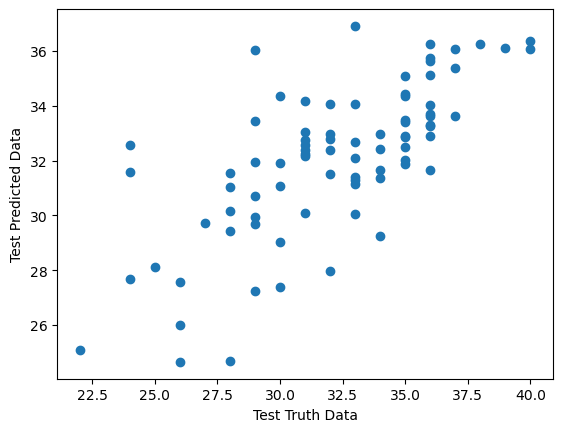

In [76]:
##assumptions of linear regression

plt.scatter(y_test, reg_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [77]:
#residuals
residuals= y_test-reg_pred

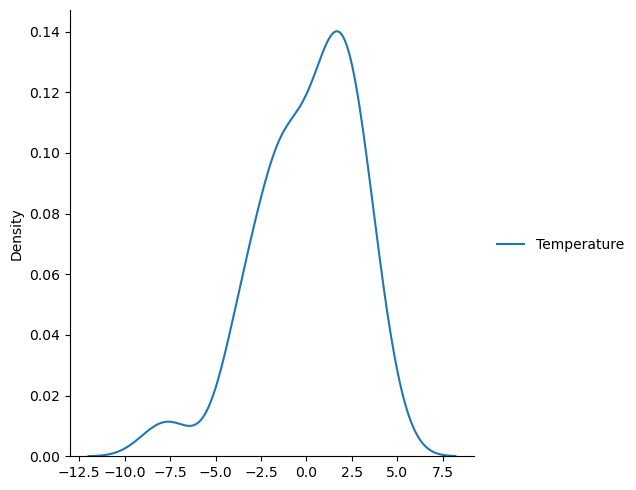

In [78]:
sns.displot(residuals, kind='kde')#distrib

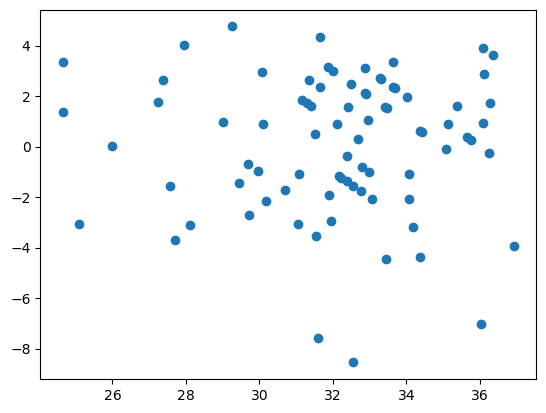

In [79]:
## Scatter plot with predictions and residual
## uniform distribution
plt.scatter(reg_pred, residuals)

In [80]:
## Performance Metrics

In [81]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,reg_pred))
print(mean_absolute_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

7.5047669730624325
2.2354993752323624
2.739482975501478


In [82]:
## R square and adjusted R square

In [83]:
## R square
from sklearn.metrics import r2_score
score = r2_score(y_test, reg_pred)
print(score)

0.5037314185907533


In [84]:
## Adjusted R Square
#display adjusted R square
1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.43283590696086094

Ridege Regression Algorithm

In [86]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge
ridge.fit(x_train, y_train)

Ridge()

In [87]:
## print the coefficients 
print(ridge.coef_)


[[-1.25483718 -0.53296814 -0.20702885  0.72895886 -0.60290935 -0.32591751
   0.24045074  0.93900788  0.21118476 -0.1916003 ]]


In [88]:
## print the intercept
print(ridge.intercept_)

[32.17791411]


In [89]:
## prediction for the test data
ridge_pred = ridge.predict(x_test)
ridge_pred

array([[31.35162743],
       [33.40986612],
       [33.72771064],
       [32.07338971],
       [32.90931259],
       [35.0319983 ],
       [32.79015818],
       [34.17178646],
       [31.97942736],
       [33.01801414],
       [33.36867288],
       [27.41069432],
       [35.06294721],
       [29.21943029],
       [31.86814167],
       [32.4415311 ],
       [34.32301905],
       [28.10883976],
       [36.28106232],
       [34.1156651 ],
       [32.5477257 ],
       [34.12721932],
       [32.95790766],
       [33.29642758],
       [36.10629748],
       [29.45172695],
       [31.55350828],
       [32.44406184],
       [27.6048532 ],
       [32.16940933],
       [26.0626233 ],
       [27.15902083],
       [34.09770279],
       [31.64258349],
       [32.74172122],
       [31.00145744],
       [29.02397313],
       [33.02208479],
       [27.70413671],
       [35.54562191],
       [32.78559985],
       [33.71213911],
       [34.19881056],
       [31.48850848],
       [36.06072934],
       [33

Text(0, 0.5, 'Test Predicted Data')

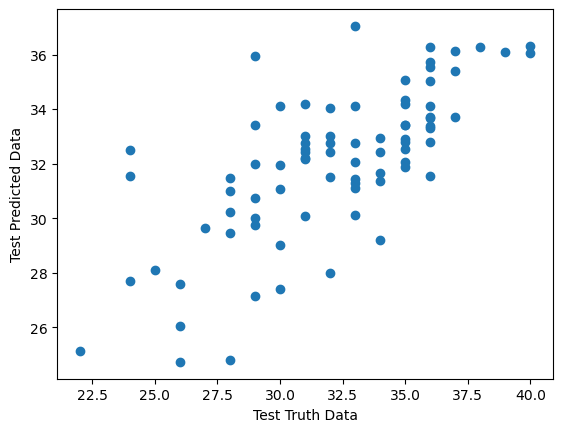

In [90]:
## Assumptions of Ridge Regression

plt.scatter(y_test, ridge_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [91]:
## residuals 
residuals = y_test-ridge_pred

In [92]:
residuals

,Temperature
162,2.648373
60,1.590134
61,2.272289
63,2.926610
69,2.090687
...,...
169,0.247491
232,-6.953924
144,1.725441
208,-4.048587


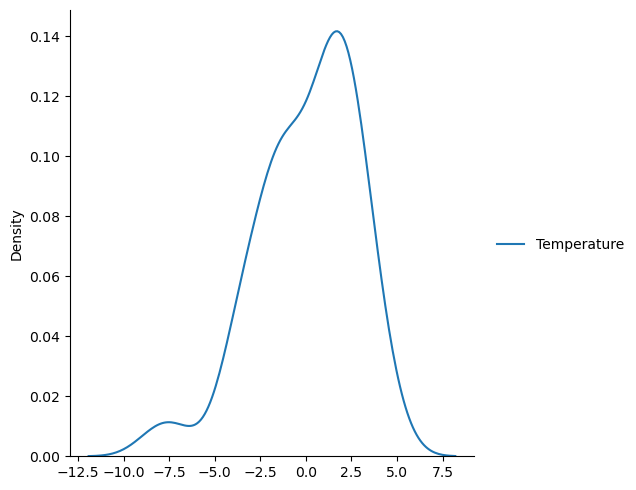

In [93]:
sns.displot(residuals, kind = "kde") # Distribution of residuals

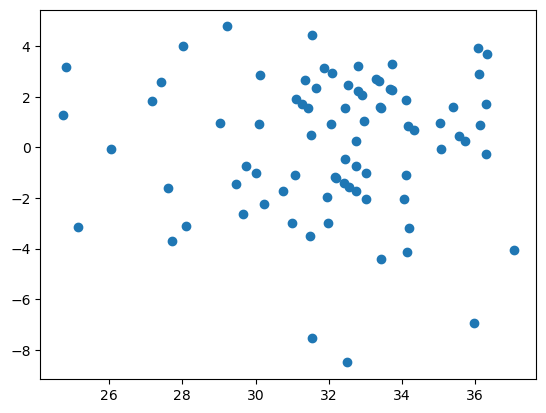

In [94]:

## Scatter plot with predictions and residual
## uniform distribution
plt.scatter(ridge_pred, residuals)

In [95]:
## residuals 
residuals = y_test-ridge_pred

In [96]:
residuals

,Temperature
162,2.648373
60,1.590134
61,2.272289
63,2.926610
69,2.090687
...,...
169,0.247491
232,-6.953924
144,1.725441
208,-4.048587


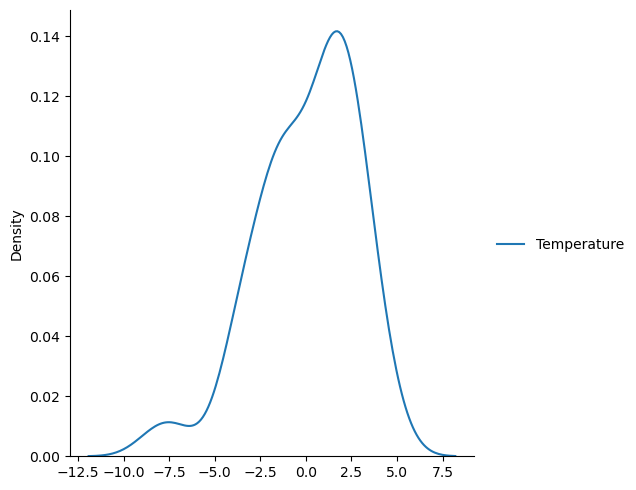

In [97]:
sns.displot(residuals, kind = "kde") # Distribution of residuals

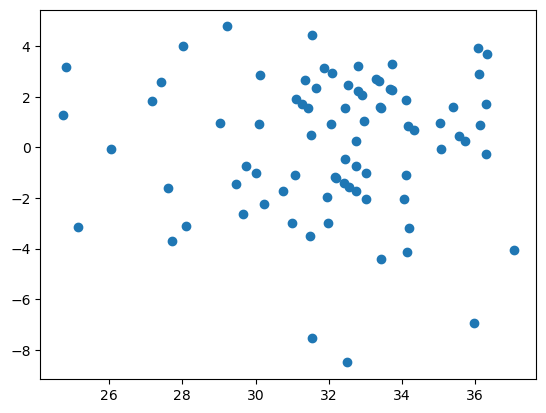

In [98]:

## Scatter plot with predictions and residual
## uniform distribution
plt.scatter(ridge_pred, residuals)

In [99]:
## Performance Metrics

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test, ridge_pred))
print(mean_absolute_error(y_test, ridge_pred))
print(np.sqrt(mean_squared_error(y_test, ridge_pred)))

7.444528719288365
2.2355295943587614
2.7284663676300585


In [100]:
## R square and adjusted R square

In [101]:
# R square
from sklearn.metrics import r2_score
score = r2_score(y_test, ridge_pred)
print(score)

0.5077148004671435


In [102]:
## Adjusted R Square
#display adjusted R square
1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.43738834339102106

# Lasso Regression Model Training


In [103]:
from sklearn.linear_model import Lasso
lasso=Lasso()
lasso
lasso.fit(x_train,y_train)

Lasso()

In [104]:
## print the coefficients
print(lasso.coef_)

[-0.71955751 -0.         -0.          0.89582004  0.         -0.
  0.          0.          0.         -0.        ]


In [105]:
## print the intercept
print(lasso.intercept_)

[32.17791411]


In [106]:

## prediction for the test data
lasso_pred = lasso.predict(x_test)
lasso_pred

array([32.29700076, 32.6744027 , 33.06609539, 32.07346965, 32.92497671,
       33.33947653, 33.32111992, 32.77042154, 32.11916885, 32.70983221,
       33.15976154, 30.29861247, 34.17172792, 30.95174825, 33.0931383 ,
       32.31497272, 32.93691477, 29.42489766, 34.46059856, 33.50695377,
       32.46152593, 33.02899752, 33.30888217, 32.80645043, 34.5498142 ,
       30.18680443, 32.38908351, 32.89121556, 29.47641605, 31.8492542 ,
       29.50217524, 28.6091198 , 33.21226395, 32.70054654, 32.64380834,
       31.80937418, 30.23515603, 32.53110125, 29.22810977, 33.62676377,
       32.55104126, 33.23190428, 33.93112391, 31.84411936, 34.06445535,
       33.20742879, 29.78847846, 33.80519505, 33.21966653, 30.53913152,
       31.62769114, 32.373594  , 33.92016988, 32.24993288, 31.51301599,
       31.26381066, 32.303719  , 34.28571873, 31.84095256, 33.47507571,
       32.27184094, 32.20868418, 31.42230192, 29.36272493, 32.24706577,
       34.47767146, 31.13749714, 31.41648274, 33.33947653, 33.04

Text(0, 0.5, 'Test Predicted Data')

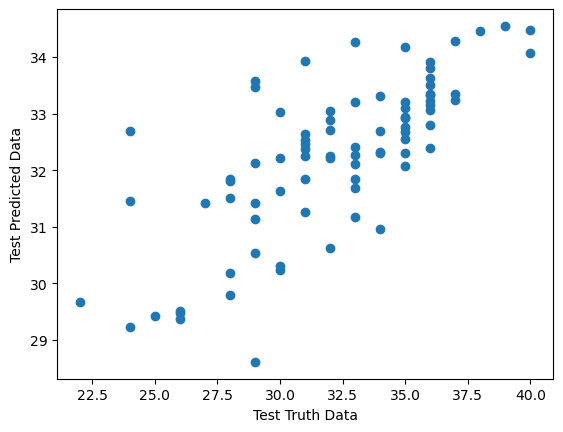

In [107]:

## Assumptions of Lasso Regression

plt.scatter(y_test, lasso_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [108]:
## Performance Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test, lasso_pred))
print(mean_absolute_error(y_test, lasso_pred))
print(np.sqrt(mean_squared_error(y_test, lasso_pred)))

9.10609532182792
2.4978660766652734
3.0176307464346794


In [109]:

## Rsquare and adjusted R square

In [110]:
# R square
from sklearn.metrics import r2_score
score = r2_score(y_test, lasso_pred)
print(score)

0.39784019626969913


In [111]:
## Adjusted R Square
#display adjusted R square
1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.31181736716537045


# Elastic Net Regression Model Training

In [112]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet()
elastic
elastic.fit(x_train, y_train)

ElasticNet()

In [113]:
## print the coefficients
print(elastic.coef_)

[-0.69396083 -0.10315403 -0.01507374  0.6926462   0.10752205 -0.
  0.28392506  0.07544656  0.05920494 -0.        ]


In [114]:
## print the intercept
print(elastic.intercept_)

[32.17791411]


In [115]:

## prediction for the test data
elastic_pred = elastic.predict(x_test)
elastic_pred

array([31.93076461, 32.89925279, 32.68965549, 31.74550697, 32.98836724,
       33.91299333, 33.41776043, 32.72078781, 31.98790062, 32.72490467,
       33.30044153, 29.87165926, 34.12217082, 30.65936304, 32.72255437,
       32.28333638, 32.84852051, 29.39040946, 35.0786389 , 33.86050655,
       32.42586731, 33.31820617, 33.43805315, 32.91463826, 35.09348452,
       29.99111145, 32.16696212, 32.5466324 , 29.35144729, 31.97557447,
       29.14216505, 28.60375228, 33.27376701, 32.28678221, 32.70561446,
       31.30843328, 30.01197805, 32.32347658, 29.15902087, 33.91042464,
       32.74766721, 33.47903767, 34.12940549, 31.56461381, 34.44958031,
       33.30036678, 29.35558024, 33.99794233, 33.3293338 , 30.2978916 ,
       31.4241864 , 32.36311525, 34.61701506, 32.03023331, 31.41948172,
       30.89419347, 32.508051  , 34.7691147 , 31.73370163, 33.3687946 ,
       32.1509131 , 32.34603101, 31.21296836, 28.90195873, 31.96458545,
       34.79046967, 30.91855019, 31.0841594 , 33.82121587, 32.95

Text(0, 0.5, 'Test Predicted Data')

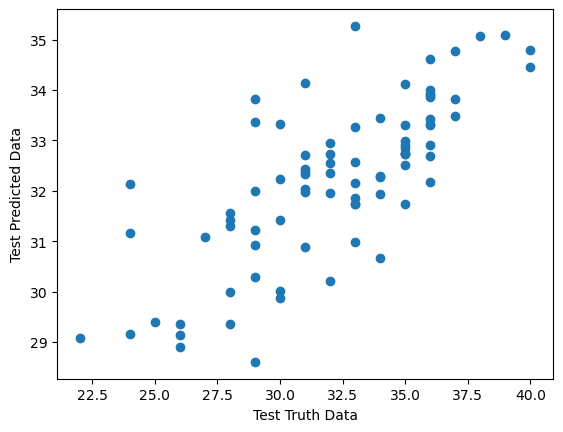

In [116]:
## Assumption of ElasticNet Regression

plt.scatter(y_test, elastic_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [117]:
## Performance Metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test, elastic_pred))
print(mean_absolute_error(y_test, elastic_pred))
print(np.sqrt(mean_squared_error(y_test, elastic_pred)))

8.346007590926806
2.398764542534911
2.888945757698958


In [118]:

# R square
from sklearn.metrics import r2_score
score = r2_score(y_test, elastic_pred)
print(score)

0.4481026043251145


In [119]:
## Adjusted R Square
#display adjusted R square
1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.3692601192287023